In [1]:
# FILTER DATA
from load_all_data import get_all_data

# [1] get all data
all_path_info, all_toboggan_data = get_all_data( [0,1,2] )
froots = ['human', 'mouse', 'zebra']


Loading human
Loading mouse
Loading zebra
Done with get_all_data



In [2]:
for dataset in froots:
    for key, row in all_toboggan_data[dataset].items():
        cutset = row[5]
        kopt = row[7]
        if cutset == 'None':
            print(key, row)
            break
        

In [3]:
# Checks for any instance whose information/pathset is inconsistent inside our data representations

"""
datamatrix[j] = [ n, m, n_red, m_red,
               k_groundtruth, cutset_bound, improved_bound, k_opt,
               t_w, t_path, timeout_flag, timeout_limit, graphname]
"""
num_nontrivto_wpaths = 0
num_wpath_notobog = 0
num_wpath_andtriv = 0
num_wpath_andto = 0

for dataset in froots:
    num_trivial = 0
    num_timeouts = 0
    for key, row in all_toboggan_data[dataset].items():
        if row[7] == '1':  # check trivials
            num_trivial += 1
        if row[10] == '1':  # check timeouts
            num_timeouts += 1
        if row[7] != '1' and row[10] != '1':
            if key not in all_path_info['toboggan'][dataset]:
                num_nontrivto_wpaths += 1
                # print(" {}  not a trivial or timeout, but not in pathinfo".format(key))
    print("\n", dataset)
    print("Num_timeouts {}".format(num_timeouts))
    print("Num trivials {}".format(num_trivial))
    print("timeouts + trivial + len(path_info) {}".format(num_timeouts + num_trivial + len(all_path_info['toboggan'][dataset])))
    print("Length of all_info {}".format(len(all_toboggan_data[dataset])))
    print("Num nontrivial, nontimeouts, but no path info {}".format(num_nontrivto_wpaths))
    
    num_instances = 0
    for key, path in all_path_info['toboggan'][dataset].items():
        if key not in all_toboggan_data[dataset]:
            # print("{} not in toboggan data, but in path data".format(key))
            num_wpath_notobog += 1
            continue
        row = all_toboggan_data[dataset][key]
        if row[7] == '1':  # check trivials
            # print(" {} has path info but also marked trivial".format(key))
            num_wpath_andtriv += 1
            # print(row)
            # print(path)
        if row[10] == '1':  # check timeouts
            num_wpath_andto += 1
            # print(" {} has path info but also marked timeout".format(key))
            # print(row)
            # print(path)




 human
Num_timeouts 2478
Num trivials 639560
timeouts + trivial + len(path_info) 1169083
Length of all_info 1169083
Num nontrivial, nontimeouts, but no path info 0

 mouse
Num_timeouts 2487
Num trivials 842873
timeouts + trivial + len(path_info) 1316058
Length of all_info 1316058
Num nontrivial, nontimeouts, but no path info 0

 zebra
Num_timeouts 178
Num trivials 1103493
timeouts + trivial + len(path_info) 1549373
Length of all_info 1549373
Num nontrivial, nontimeouts, but no path info 0


In [4]:
# [1] Determine
"""
all_toboggan_data[froot][key] = row
            row = [ n, m, n_red, m_red,
                  k_groundtruth, k_opt, cutset_bound, improved_bound,
                  t_w, t_path]
"""

for dataset in froots:
    num_kopt_eq_kgt = 0
    num_kopt_eq_kgt_and_cutset = 0
    num_kopt_eq_cutset = 0
    num_toboggan_eq_gt = 0
    num_trivial = 0
    num_tobog_trivial = 0
    num_total = 0
    num_timeouts = 0
    num_problems = 0
    print("\nStarting {}".format(dataset))
    for key, row in all_toboggan_data[dataset].items():
        num_total += 1
        if row[3] == '0':
            num_trivial += 1
            continue            
        max_cutset = int(row[5])
        k_opt = row[7]
        if k_opt == 'None':  # timeouts
            num_timeouts += 1
            continue
        toboggan_paths = all_path_info['toboggan'][dataset][key]
        gt_paths = all_path_info['groundtruth'][dataset][key]
        k_opt = int(k_opt)
        #k_opt = len(set(toboggan_paths))
        k_gt = len(set(gt_paths))
        if len(set(toboggan_paths)) == 0:  # k_opt == 1
            num_tobog_trivial += 1
            continue
        
        if int(k_opt) != len(set(toboggan_paths)):
            print(key, row, len(toboggan_paths))
            num_problems += 1

        if k_opt == k_gt:
            num_kopt_eq_kgt += 1
            if k_opt == max_cutset:
                num_kopt_eq_kgt_and_cutset += 1
        if k_opt == max_cutset:
            num_kopt_eq_cutset += 1
        if gt_paths == toboggan_paths:
            num_toboggan_eq_gt += 1

    print("Num total {:15d}".format(num_total))
    print("Num trivial {:15d}".format(num_trivial))
    print("Num trivial tobog{:15d}".format(num_tobog_trivial))
    num_nontrivial = num_total - num_trivial - num_timeouts
    print("Num nontrivial, nontimeout {:15d}".format(num_nontrivial))
    print("Num problems {:15d}".format(num_problems))
    print("Num kopt = kgt {:10.3%}".format(num_kopt_eq_kgt/num_nontrivial))
    print("Num kopt = kgt = cutset {:10.3%}".format(num_kopt_eq_kgt_and_cutset/num_nontrivial))
    print("Num kopt = cutset {:10.3%}".format(num_kopt_eq_cutset/num_nontrivial))
    print("Num tobog = gt {:10.3%}".format(num_toboggan_eq_gt/num_nontrivial))



Starting human
Num total         1169083
Num trivial          639560
Num trivial tobog              0
Num nontrivial, nontimeout          527045
Num problems               0
Num kopt = kgt    99.956%
Num kopt = kgt = cutset    98.084%
Num kopt = cutset    98.106%
Num tobog = gt    93.089%

Starting mouse
Num total         1316058
Num trivial          842873
Num trivial tobog              0
Num nontrivial, nontimeout          470698
Num problems               0
Num kopt = kgt    99.926%
Num kopt = kgt = cutset    97.554%
Num kopt = cutset    97.585%
Num tobog = gt    90.112%

Starting zebra
Num total         1549373
Num trivial         1103493
Num trivial tobog              0
Num nontrivial, nontimeout          445702
Num problems               0
Num kopt = kgt    99.947%
Num kopt = kgt = cutset    98.126%
Num kopt = cutset    98.151%
Num tobog = gt    89.684%


catfish has 18088
toboggan has 38901


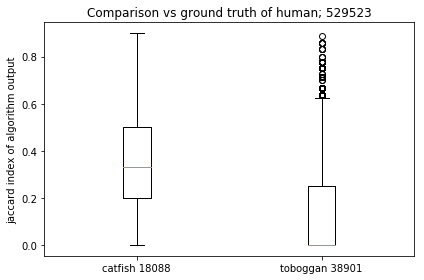

Done with plot alg-recall-
catfish has 16660
toboggan has 49028


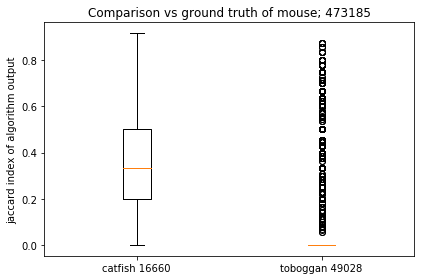

Done with plot alg-recall-
catfish has 9069
toboggan has 46158


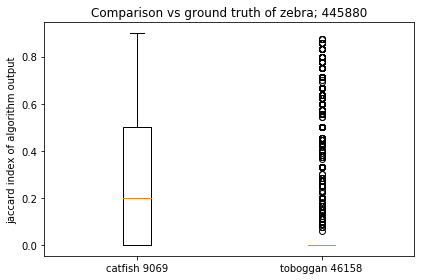

Done with plot alg-recall-


In [7]:
# LOOKING AT jaccard index WHEN TOBOGGAN != GT
import numpy
import matplotlib.pyplot as plt
import collections
    
show_flag = True

data_catfish = []
data_toboggan = []
num_nontrivials = []

def get_stats(set1, set2):
    identical = False
    if set1 == set2:
        identical = True
    len_intersect = len(set1.intersection(set2))
    jaccard = len_intersect / ( len(set1) + len(set2) - len_intersect )
    if len(set1) == 0:
        recall = 1.0
    else:
        recall = len_intersect / len(set1)

    return recall, jaccard, identical

for which_dataset in [0,1,2]:
    froot = froots[which_dataset]
    gt_pathset_dict = all_path_info['groundtruth'][froot]
    all_toboggan_paths = all_path_info['toboggan'][froot]
    all_catfish_paths = all_path_info['catfish'][froot]

    this_catfish = []
    this_toboggan = []
    this_num_nontrivial = 0
    for key, gt_path in gt_pathset_dict.items():
        gt_size = len(gt_path)
        if gt_size == 1:  # skip trivial instances
            continue
        cat_recall, cat_jaccard, cat_identical = get_stats(gt_path, all_catfish_paths[key])
        tob_recall, tob_jaccard, tob_identical = get_stats(gt_path, all_toboggan_paths[key])
        if not cat_identical:
            this_catfish.append( (gt_size, cat_recall, cat_jaccard, key) )
        if not tob_identical:
            this_toboggan.append((gt_size, tob_recall, tob_jaccard, key) )
        this_num_nontrivial += 1
    
    #     data_catfish.append(this_catfish)
    #     data_toboggan.append(this_toboggan)
    #     num_nontrivials.append(this_num_nontrivial)
    data_catfish = this_catfish
    data_toboggan = this_toboggan
    num_nontrivial = this_num_nontrivial

    print("catfish has {}".format(len(data_catfish)))
    print("toboggan has {}".format(len(data_toboggan)))

    figurename = 'alg-recall-'
    alg_names = ['catfish', 'toboggan']
    colors = ['red', 'blue']

    plt.close()
    plt.clf()

    sizes_cat, recall_cat, jaccard_cat, keys_cat = zip(*data_catfish)
    sizes_tob, recall_tob, jaccard_tob, keys_tob = zip(*data_toboggan)

    fig = plt.figure(1, figsize=(9, 6))
    ax = fig.add_subplot(111)
    ax.boxplot( [jaccard_cat, jaccard_tob] )

    plt.title('Comparison vs ground truth of {}; {}'.format(froot, num_nontrivial))
    plt.ylabel('jaccard index of algorithm output')
    ax.set_xticklabels( [alg_names[0] + " {}".format(len(data_catfish)), alg_names[1] + " {}".format(len(data_toboggan))] )
    fig.tight_layout()

    if show_flag:
        plt.show()
    else:
        plt.savefig( './figures/' + ''.join([figurename, froot, '.pdf']), format='pdf', dpi=300)
        plt.savefig( './figures/' + ''.join([figurename, froot, '.png']), format='png', dpi=300)
    plt.close()
    print("Done with plot {}".format(figurename))